In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
titanic = pd.read_csv('titanic_train.csv')

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


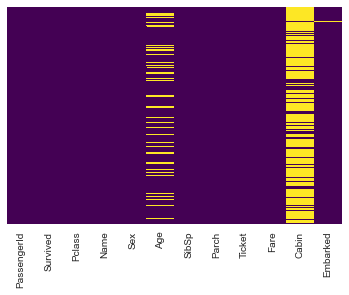

In [10]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

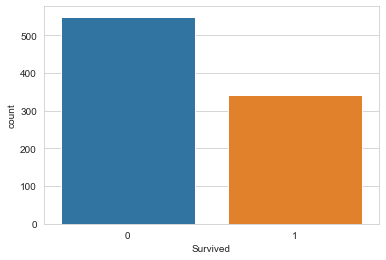

In [11]:
sns.countplot(x='Survived',data=titanic)

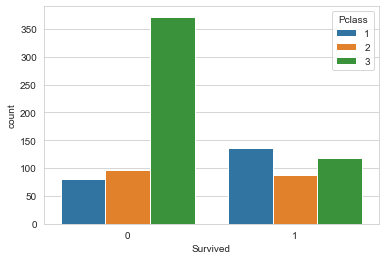

In [12]:
sns.countplot(x="Survived",hue="Pclass",data=titanic)

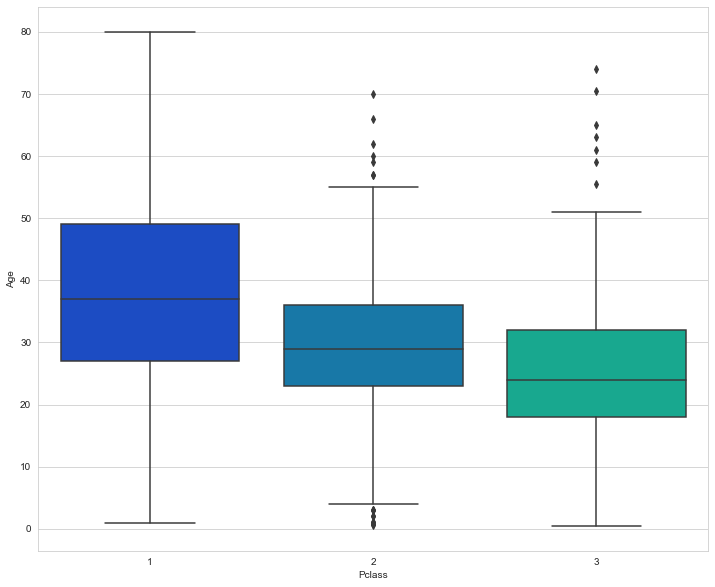

In [13]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [14]:
def compute(column):
    Age = column[0]
    Pclass = column[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
        

In [15]:
titanic['Age'] = titanic[['Age','Pclass']].apply(compute,axis=1)

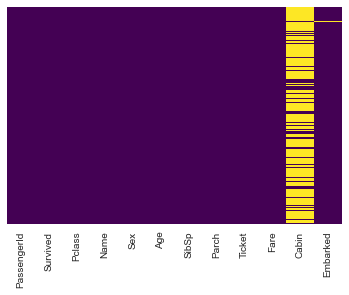

In [16]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [23]:
titanic.dropna(inplace=True)

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [33]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1.0,0.0,1.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,C85,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,NaN,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,C123,0.0,0.0,1.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,NaN,1.0,0.0,1.0,1.0,0.0,1.0


In [40]:
titanic.drop(["Cabin"],axis=1,inplace=True)

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,1.0,0.0,1.0
